In [1]:
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection

In [2]:
# 读取CSV文件
df = pd.read_csv("../../processed_dataset/Data.csv")

In [3]:
# 读取列名文件
with open("../../processed_dataset/final_features.txt", "r") as file:
    selected_columns = [line.strip() for line in file]

# 添加'tackle_assist_success'列
selected_columns.append('tackle_assist_success')

# 在DataFrame中仅保留所选列
df = df[selected_columns]

df.head()

dis_ballcarrier_tackler|min  o_standard_tackler|mean  ballcarrier_x_range  \
0                     0.353412               243.486735                14.42   
1                     0.319531               194.060000                 1.21   
2                     0.325576               104.441800                 5.18   
3                     0.375366               237.212600                 5.18   
4                     0.240416               260.619636                11.40   

   o_standard_tackler|skew  dis_ballcarrier_tackler|mean  o_tackler|std  \
0                -1.689632                     11.599050      51.314965   
1                -0.187944                      1.103907     128.588694   
2                 0.956788                      2.745755      92.490039   
3                -0.428398                      2.575385      52.261286   
4                 5.159116                      3.753073      12.788584   

   x_standard_ballcarrier|max  momentum_tackler|skew  s_tackler|mean  \
0                       54.81               0.011192        2.039112   
1                       60.21               0.138439        2.688793   
2                       86.88               0.681306        1.800819   
3                       86.88               0.749411        1.754185   
4                       54.32              -1.158870        2.981110   

   power_tackler|skew  ...  dis_ballcarrier_tackler|std  \
0            0.406975  ...                     7.123702   
1           -0.307915  ...                     0.813950   
2            0.766512  ...                     1.235816   
3            1.129921  ...                     3.053362   
4            1.002690  ...                     3.604446   

   x_standard_ballcarrier|std  assist|max  x_ballcarrier|std  \
0                    4.995149           0           4.995149   
1                    0.402561           0           0.402561   
2                    1.517915           0           1.517915   
3                    1.517915           0           1.517915   
4                    4.277748           0           4.277748   

   ballcarrier_y_range  dis_ballcarrier_tackler|skew  tackler_x_range  \
0                11.11                     -0.357283             5.01   
1                 1.05                      1.389278             4.09   
2                 3.65                      0.755065             3.62   
3                 3.65                      1.452462             6.59   
4                 9.60                      0.438490             5.38   

   y_standard_tackler|skew  dis_tackler|mean  tackle_assist_success  
0                -0.097733          0.225510                      1  
1                 0.565220          0.289500                      1  
2                 0.776466          0.200000                      0  
3                -1.403647          0.199600                      1  
4                -0.122112          0.329273                      1  

[5 rows x 22 columns]

In [4]:
# 划分特征和目标列
X = df.drop(columns=['tackle_assist_success'])
y = df['tackle_assist_success']

# 将'tackle_assist_success'列转换为二进制分类目标
threshold = 0.5
y = (y > threshold).astype(int)

# 划分数据集为80%训练集和20%验证集
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化不同的分类器
classifiers = {
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Neural Network': MLPClassifier()
}

# 存储不同分类器的交叉验证得分、分类报告和准确度
scores = {}
reports = {}
accuracies = {}

for clf_name, clf in classifiers.items():
    # 计算交叉验证得分
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores[clf_name] = cv_scores

    # 训练模型并生成分类报告
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    report = classification_report(y_valid, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
    reports[clf_name] = report

    # 计算准确度并存储
    accuracy = accuracy_score(y_valid, y_pred)
    accuracies[clf_name] = accuracy

# 将得分数据转换为DataFrame
scores_df = pd.DataFrame(scores)

# 使用Plotly绘制箱型图
fig1 = px.box(scores_df, title='不同分类器的交叉验证得分',
             labels={'variable': '分类器', 'value': '得分'},
             boxmode='group')

# 创建单独的图表，每个指标一个图
figs = []

for metric in ['precision', 'recall', 'f1-score']:
    metric_data = {}
    for clf_name, report in reports.items():
        metric_data[clf_name] = report['Class 0'][metric], report['Class 1'][metric]

    metric_df = pd.DataFrame(metric_data)
    metric_fig = px.bar(metric_df, title=f'不同分类器的{metric}指标',
                        labels={'variable': '分类器', 'value': metric},
                        barmode='group')
    
    figs.append(metric_fig)

# 创建准确度的直方图
accuracy_fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()), 
                      title='不同分类器的准确度',
                      labels={'x': '分类器', 'y': '准确度'})

fig1.show()

for metric_fig in figs:
    metric_fig.show()

accuracy_fig.show()

c:\Users\spdor\anaconda3\envs\python_all\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\spdor\anaconda3\envs\python_all\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

从箱线图中可以看出，使用MLP分类器的效果最好。下面使用MLP分类器进一步分析。

In [5]:
import shap
from sklearn.model_selection import KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier()
model.fit(X_train, y_train)

# 使用摘要数据集创建解释器
K = 50
X_train_summary = shap.sample(X_train, K)
explainer = shap.KernelExplainer(model.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/2395 [00:00<?, ?it/s]

In [ ]:
import numpy as np

global_importances = np.abs(shap_values).mean(0)[:-1]

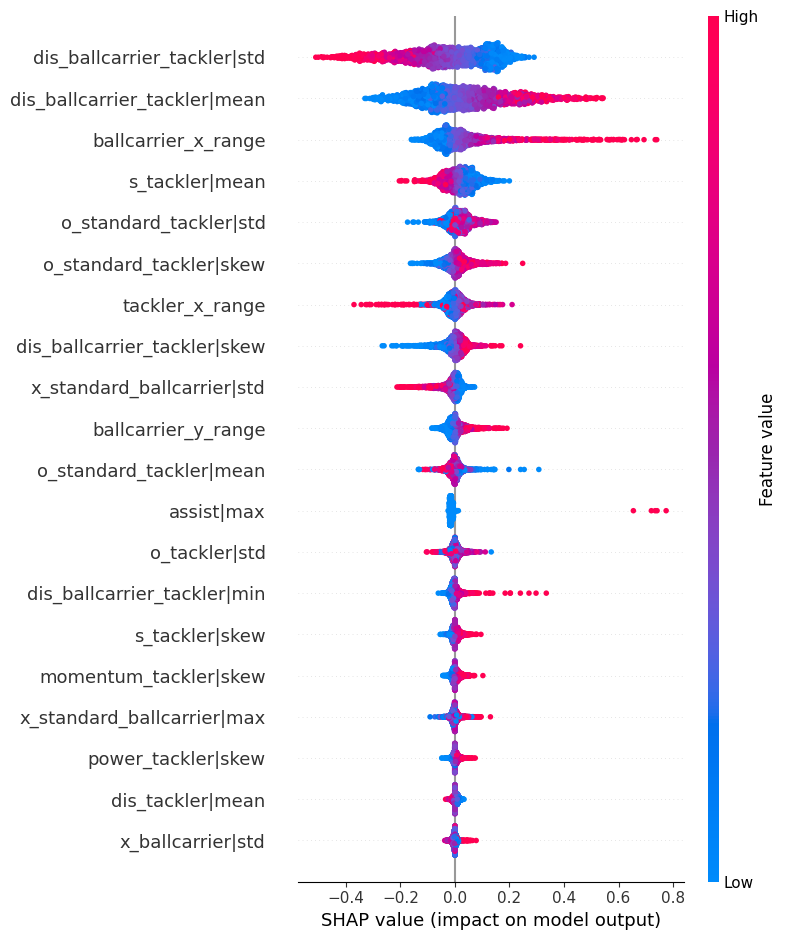

In [ ]:
# tackle失败，各特征的贡献
shap.summary_plot(shap_values[0], X_test)

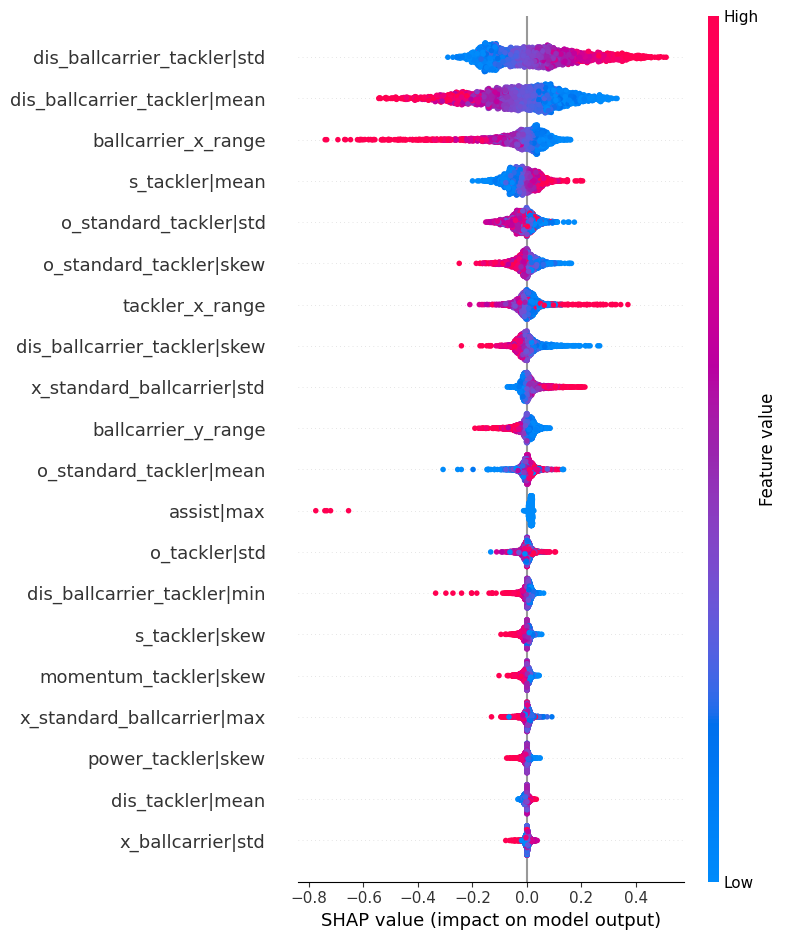

In [ ]:
# tackle成功，各特征的贡献
shap.summary_plot(shap_values[1], X_test)

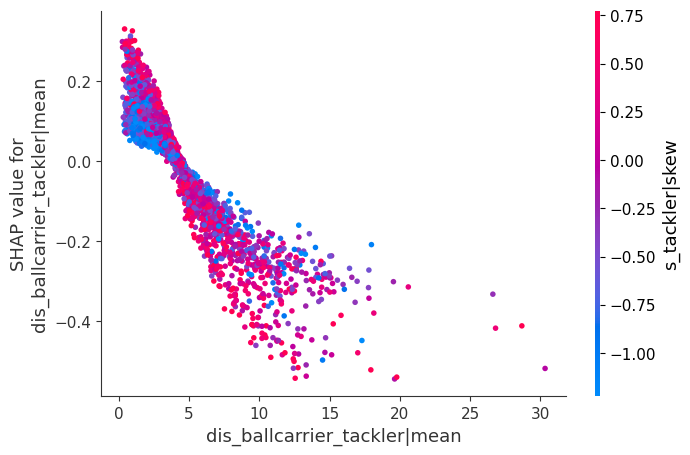

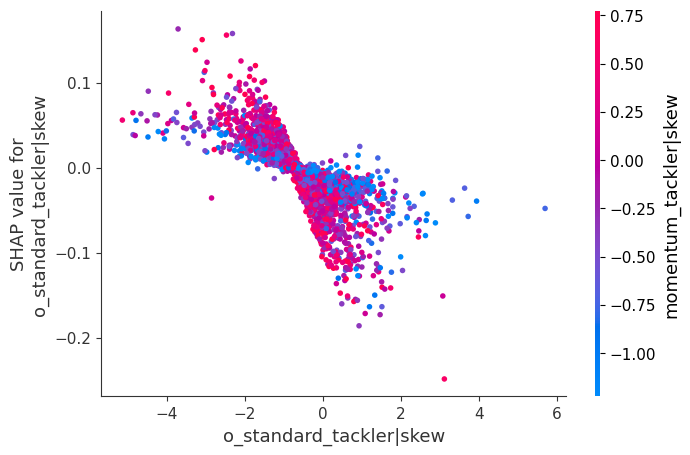

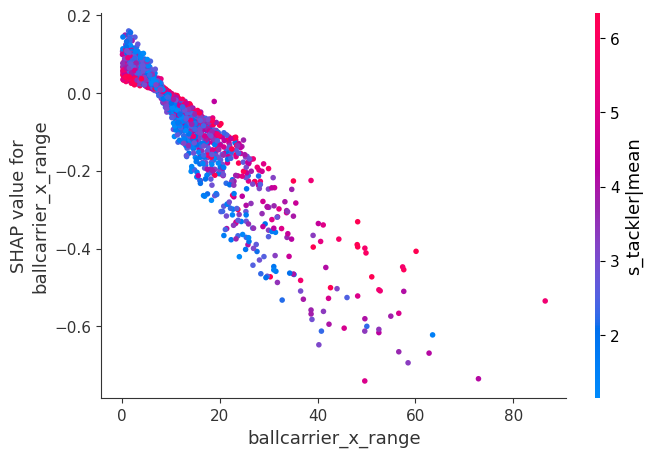

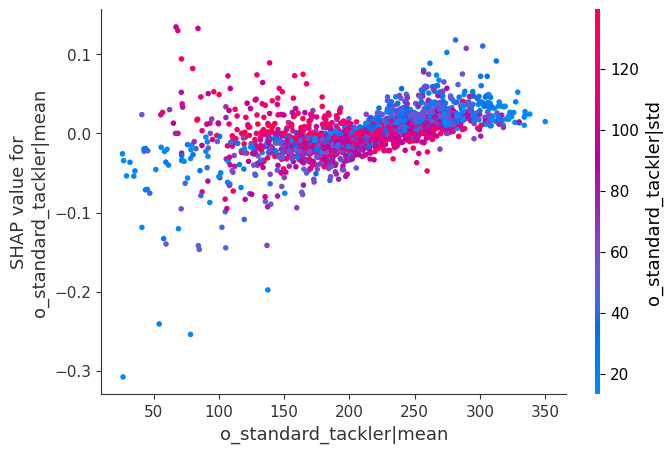

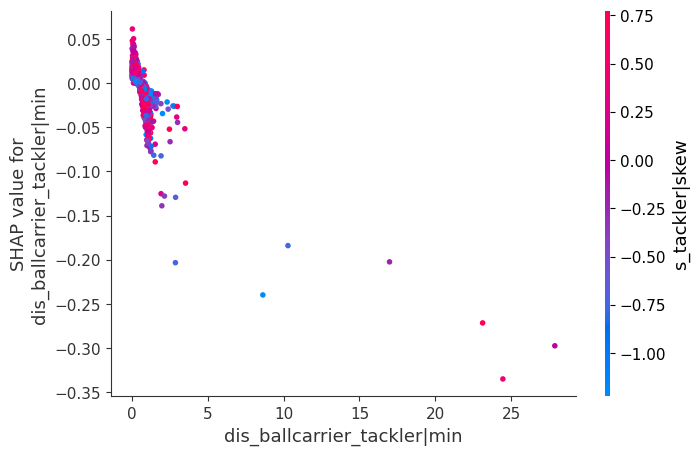

In [ ]:
# tackle成功的依赖图
for i in reversed(X.columns[:5]):
    shap.dependence_plot(i, shap_values[1], X_test)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

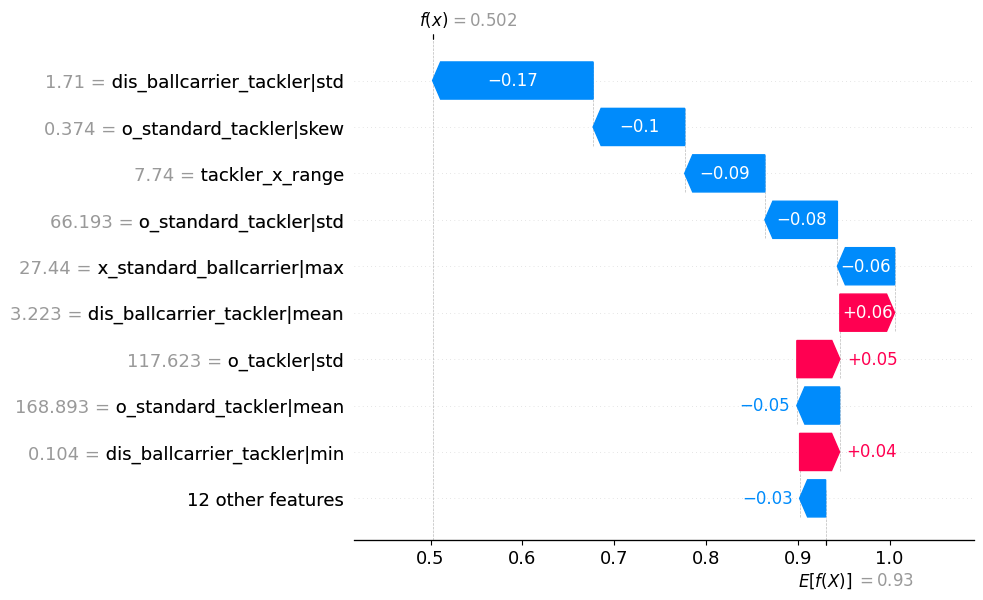

In [ ]:
sample_idx = 8 # tackle失败
# sample_idx = 0 # tackle成功

# 从 shap_values 中提取这个样本的 SHAP 值
# 关注tackle成功
sample_shap_values = shap_values[1][sample_idx]

# 创建单个样本的 shap.Explanation 对象
sample_expl = shap.Explanation(
    values=sample_shap_values,
    base_values=explainer.expected_value[1],  # 基线值
    data=X_test.iloc[sample_idx, :],  # 选定样本的特征值
    feature_names=X_test.columns
)

# 绘制瀑布图
shap.waterfall_plot(sample_expl)